# LFQ PROTOMAP
### requirements
Python 3.10, Biopython, re, Matplotlib, mpld3
### database search
rawdata naming: `<group>_<fration>.raw`
* MaxQuant  
`No fractions`  
`Set fractions`=1  
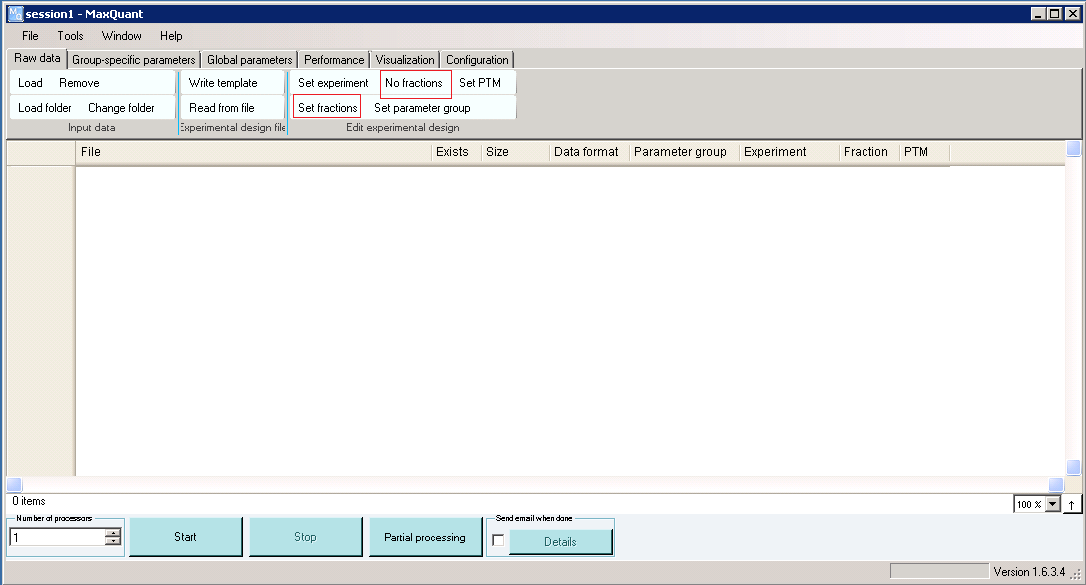

```
Group-specific params  
    Label-free quantification
        Label-free quantification=LFQ  
        Skip normalization  
    Misc.  
        Re-qualify
```  

* FragPipe  
`By file name`  
`LFQ-MBR(match between runs)`  
Leave `Bioreplicate` blank  
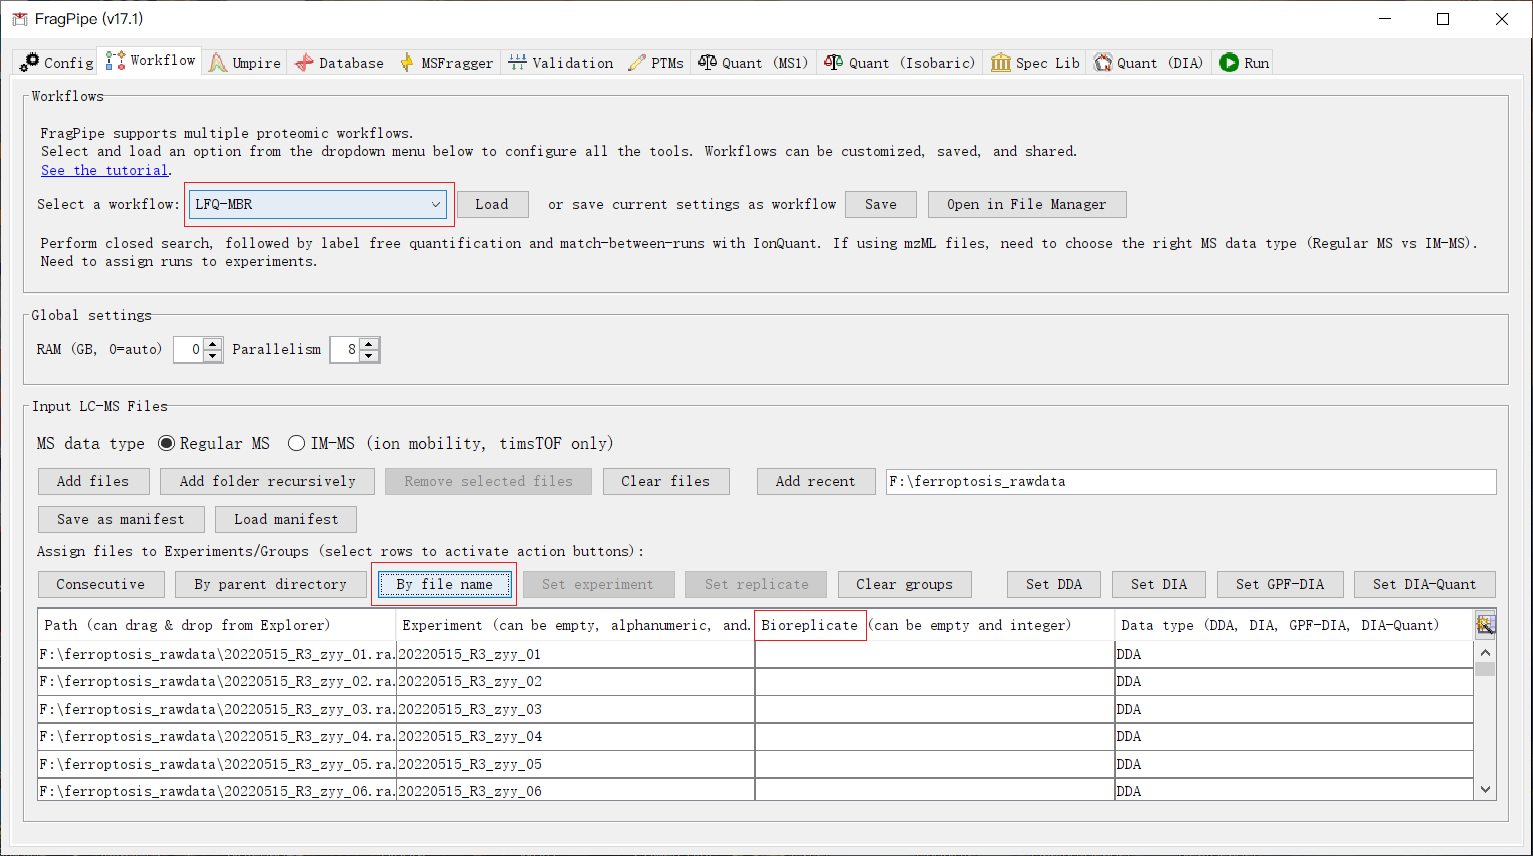

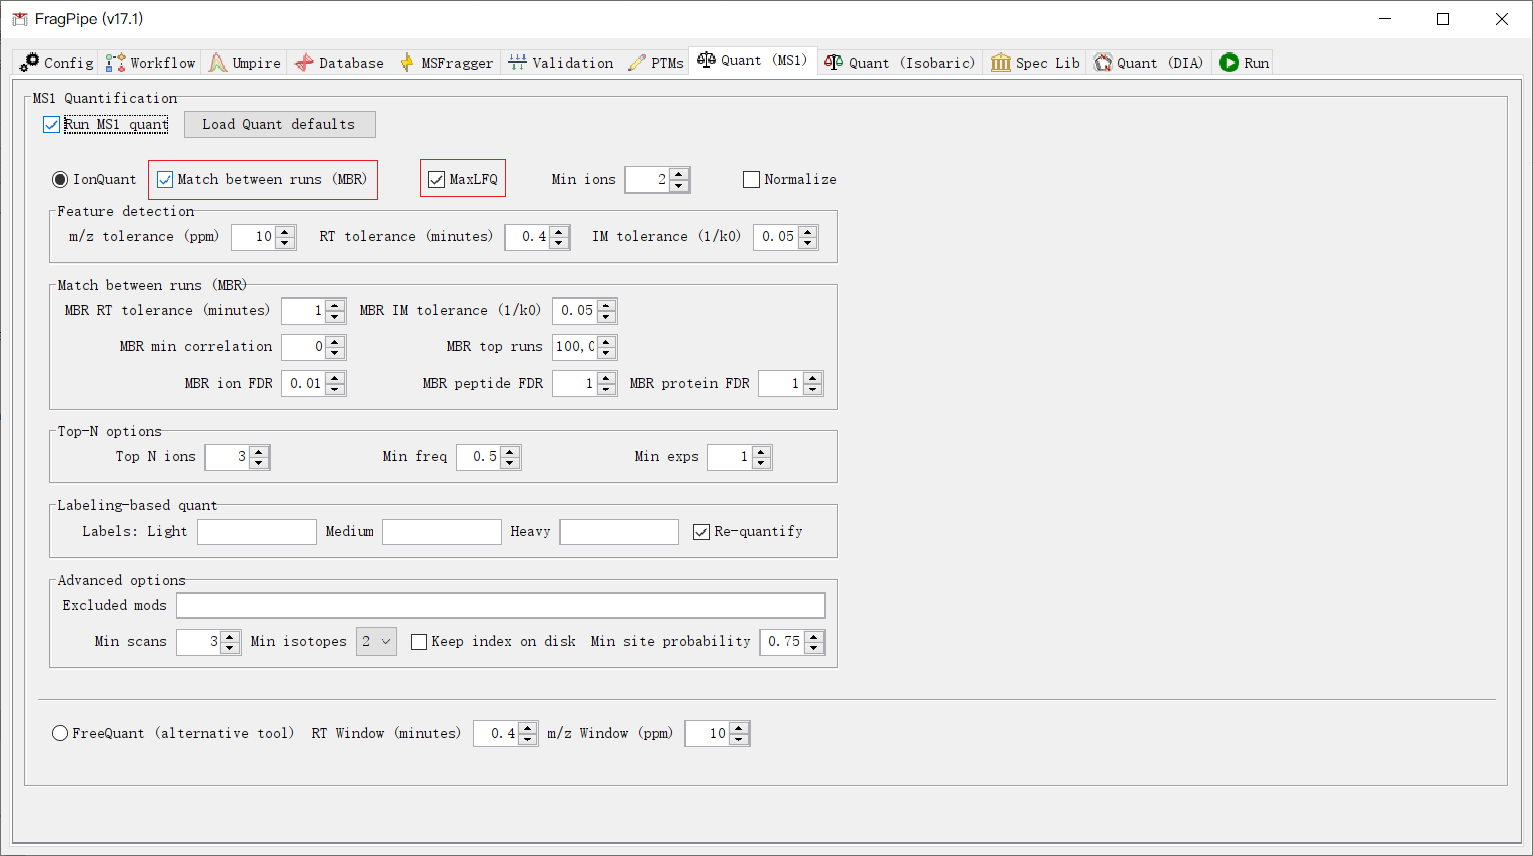
Basic Tutorial: https://fragpipe.nesvilab.org/docs/tutorial_fragpipe.html#lfq-label-free-quantification  
**There should be 2*N LFQ intensity columns in the quantification results!** 

In [1]:
from protomap.proteins import ProteinGroups,Protein
from protomap.mapping import ProtoMap
from protomap.screening import screen
from protomap.fileio import filehandle, file_to_set
from protomap.uniprot_API import id_mapping

### Input files
value: path of a file, or any object with .read() and .chunk() methods
* proteins: `ProteinGroups.txt`(MaxQuant) or `combined_protein.tsv`(FragPipe) 
* peptides: `peptides.txt`(MaxQuant) or `combined_peptide.tsv`(FragPipe) 
* fasta: the `.fasta` file which rawdata is searched against(**without decoys**)
* markers (optional): tab-seperated `.txt` file recording masses and migrations of markers, such as:  

``` 
250	2
150	3
100	5
75	6
50	10
37	13
25	18
20	20
```

In [4]:
files={
    "proteins":'./FePROTOMAP_2/proteinGroups.txt',
    "peptides":'./FePROTOMAP_2/peptides.txt',
    "fasta":'../LFQ_PROTOMAP/human_reviewed.fasta',
    "markers":'./example/markers.txt',
}
# refer to the definition of ProteinGroups and ProtoMap for more details
data=filehandle(files,filt=True,filtints=False, invertgroup=False)
renderer=ProtoMap(save_path="./imgs-rep2/",side_axis=True,legend=["RSL3","DMSO"],dpi=100)

/home/wendao/.conda/envs/ms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (191) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
# plotting
for protein in data:
    renderer.plot(protein)